In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
handWritten = pd.read_csv("DataB.csv", sep=',')
handWritten.drop(columns=[handWritten.columns[0]],axis=1,inplace=True)
V = ['fea.'+str(i+1) for i in range(784)]
R = 'gnd'
VR = V +[R]
SS = StandardScaler()
handWritten[V] = SS.fit_transform(handWritten[V])

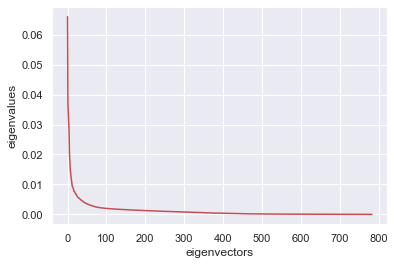

In [3]:
from sklearn.decomposition import PCA
pca=PCA().fit(handWritten[V])
y=pca.explained_variance_ratio_
x=pca.components_
plt.xticks = [range(0,20,1)]
plt.xlabel('eigenvectors')
plt.ylabel('eigenvalues')
plt.plot(y,'r')

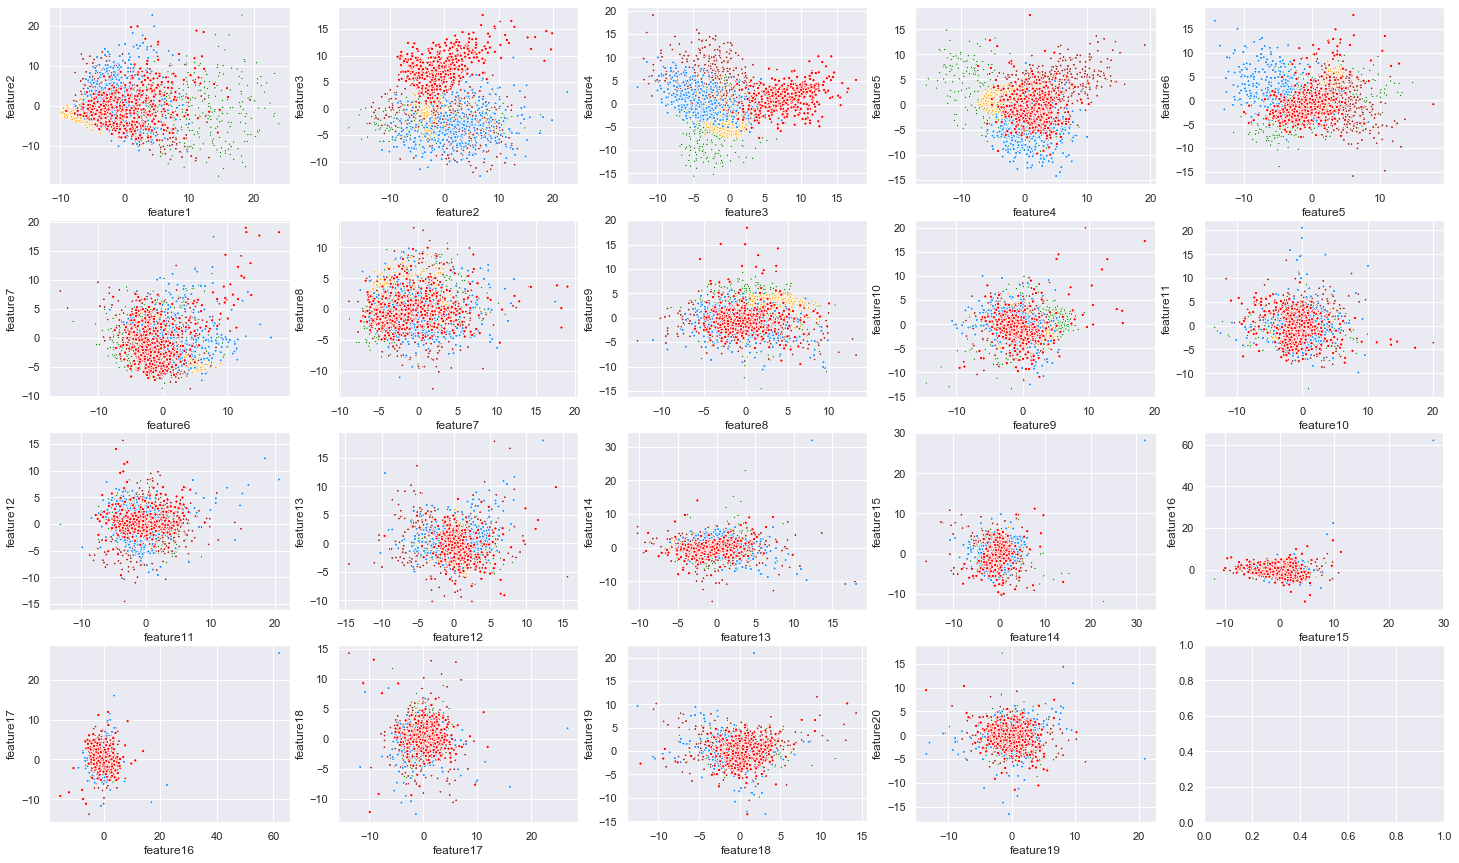

In [4]:
transformer=PCA(n_components=20)
Data = pd.DataFrame(transformer.fit_transform(handWritten[V]))
Data.columns = ['feature'+str(i+1) for i in range(20)]
Data['gnd'] = handWritten['gnd']
fig, axes =plt.subplots(4,5,figsize=(25,15))
for j in range(19):
    sns.scatterplot(x="feature"+str(j+1), y="feature"+str(j+2),
                    ax=axes[int(j/5)][j%5],size='gnd' ,sizes=(5,10),legend = False ,hue="gnd", data=Data,palette=['green','orange','brown','dodgerblue','red'])

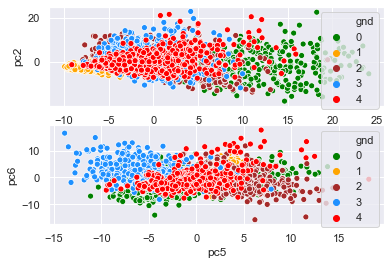

In [5]:
pca=PCA(n_components=6).fit(handWritten.values)
X1=pd.DataFrame(pca.transform(handWritten))
X1.columns=['pc'+str(i+1) for i in range(6)]
X1['gnd']=handWritten['gnd']
fig, axes =plt.subplots(2,1)
sns.scatterplot(x="pc1", y="pc2",hue="gnd",ax=axes[0], data=X1,palette=['green','orange','brown','dodgerblue','red'])
sns.scatterplot(x="pc5", y="pc6",hue="gnd",ax=axes[1], data=X1,palette=['green','orange','brown','dodgerblue','red'])

In [6]:
#svd implementation
import numpy.linalg as linalg
def my_svd(X):
    n, m = X.shape
    eigValueU , eigVectorU = linalg.eigh(np.dot(X, X.T))
    eigValueV , eigVectorV = linalg.eigh(np.dot(X.T, X))
    indexU = eigValueU.argsort()[::-1]
    indexV = eigValueV.argsort()[::-1]
    eigValueU = eigValueU[indexU]
    eigVectorU = eigVectorU[:,indexU ]
    eigValueV = eigValueV[indexV]
    eigVectorV = eigVectorV[:,indexV]
    if n>m:
        sigma=np.sqrt(eigValueU)
    else:
        sigma=np.sqrt(eigValueV)
    return eigVectorU, sigma ,eigVectorV.T

In [7]:
import time
from statistics import mean 

In [8]:
data = handWritten[V].values
#pca
time_start = time.perf_counter()
eigValueU , eigVectorU = linalg.eigh(np.dot(data.T, data))
indexU = eigValueU.argsort()[::-1]
eigValueU = eigValueU[indexU]
eigVectorU = eigVectorU[:,indexU ]
X_pca = eigVectorU.T.dot(data.T).T
time_over = time.perf_counter()
print("running time: "+str(time_over-time_start))
print(X_pca)

running time: 0.3689922300000035
[[ 9.97069222e+00  6.18172201e+00 -4.99286326e+00 ... -2.84664097e-02
   6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01  6.94158705e+00 -5.06302886e+00 ... -2.28147473e-01
   4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00  4.69309729e+00 -2.90865640e+00 ...  1.15182625e-01
  -5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01  9.33681056e-01  8.10744188e+00 ... -6.93521885e-02
  -8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00  2.09047425e+00  6.27251911e+00 ...  1.26995790e-01
   1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00 -2.46166632e-01  4.14018317e+00 ...  1.57632818e-02
  -1.77113186e-02 -1.11643749e-02]]


dual pca via SVD

In [9]:
#dual_pca
time_start = time.perf_counter()
U,s,VT = my_svd(data.T)
time_over = time.perf_counter()
print("svd running time: "+str(time_over-time_start))
time_start = time.perf_counter()
X_dual_PCA = np.diag(s).dot(VT)[:784].T
time_over = time.perf_counter()
print("dual pca running time: "+str(time_over-time_start))
print(X_dual_PCA)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in sqrt
  app.launch_new_instance()


svd running time: 3.444919376999998
dual pca running time: 0.5355880999999982
[[ 9.97069222e+00 -6.18172201e+00  4.99286326e+00 ...  2.84664097e-02
  -6.97997657e-02  7.44883255e-02]
 [ 1.14159998e+01 -6.94158705e+00  5.06302886e+00 ...  2.28147473e-01
  -4.55949595e-02  6.14775845e-02]
 [ 3.69011918e+00 -4.69309729e+00  2.90865640e+00 ... -1.15182625e-01
   5.60241248e-03  3.14112641e-02]
 ...
 [-3.49421529e-01 -9.33681056e-01 -8.10744188e+00 ...  6.93521885e-02
   8.49495279e-02 -1.65756817e-02]
 [-3.11526327e+00 -2.09047425e+00 -6.27251911e+00 ... -1.26995790e-01
  -1.46191708e-02  2.07556239e-03]
 [-5.64409375e+00  2.46166632e-01 -4.14018317e+00 ... -1.57632818e-02
   1.77113186e-02 -1.11643749e-02]]


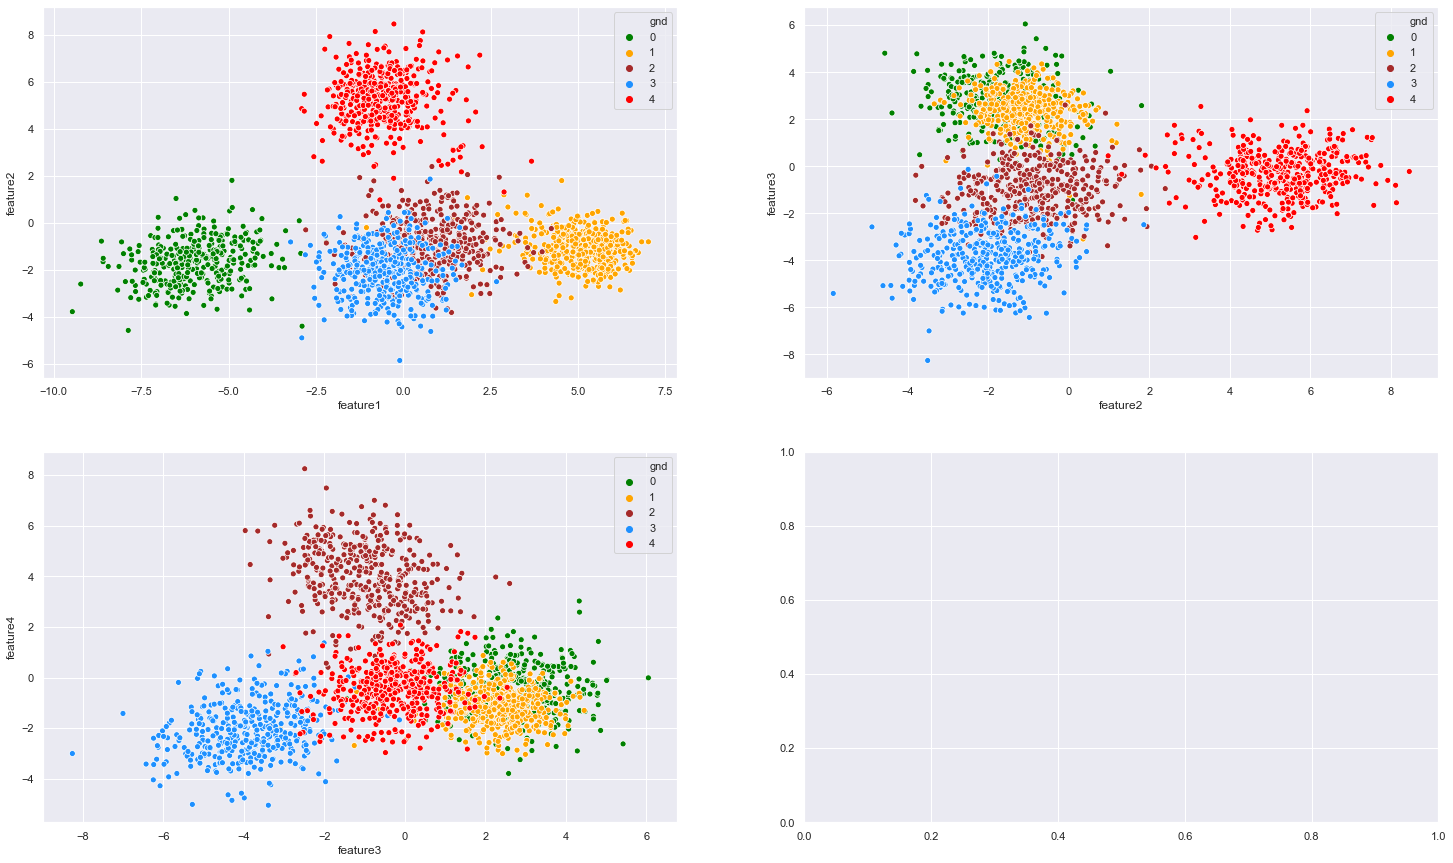

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
transformer=LinearDiscriminantAnalysis()
Data = pd.DataFrame(transformer.fit_transform(handWritten[V],handWritten[R]))
Data.columns = ['feature'+str(i+1) for i in range(4)]
Data['gnd'] = handWritten['gnd']
fig, axes =plt.subplots(2,2,figsize=(25,15))
for j in range(3):
    sns.scatterplot(x="feature"+str(j+1), y="feature"+str(j+2),
                    ax=axes[int(j/2)][j%2],legend = 'full' ,hue="gnd", data=Data,palette=['green','orange','brown','dodgerblue','red'])